# Desafio AceleraDev

![Logo CodeNation](https://www.codenation.dev/_nuxt/img/9bd98ba.svg)

# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016.

## Tópicos

Neste desafio você aprenderá:

- Lógica
- Análise de dados
- Estatística
- Regression

## Detalhes

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Muitas universidades brasileiras utilizam o ENEM para selecionar seus futuros alunos e alunas. Isto é feito com uma média ponderada das notas das provas de matemática, ciências da natureza, linguagens e códigos, ciências humanas e redação, com os pesos abaixo:

- matemática: 3
- ciências da natureza: 2
- linguagens e códigos: 1.5
- ciências humanas: 1
- redação: 3

No arquivo test.csv crie um modelo para prever nota da prova de matemática (coluna **NU_NOTA_MT**) de quem participou do ENEM 2016. 

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: **NU_INSCRICAO** e **NU_NOTA_MT**.

Faça o upload do arquivo answer.csv usando o botão "Submeter resposta".

## Observações

O objetivo do desafio é avaliar a sua capacidade de resolver problemas, então ele pode ser resolvido em qualquer linguagem de programação ou ferramenta que você tenha facilidade. Mas recomendamos o uso de linguagens com maior ferramental de matemática e estatística como Python, R, Scala ou Julia.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [3]:
df_train.shape

(3610, 167)

In [4]:
df_test.shape

(4576, 47)

In [5]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [0]:
# seleção baseada em análise do dicionário de dados
features = [
            'NU_INSCRICAO',
            # 'TP_COR_RACA',
            # 'TP_ST_CONCLUSAO',
            # 'TP_ANO_CONCLUIU',
            # 'TP_ESCOLA',
            # 'TP_ENSINO',
            # 'IN_TREINEIRO',
            # 'TP_DEPENDENCIA_ADM_ESC',
            # 'IN_BAIXA_VISAO',
            # 'IN_CEGUEIRA',
            # 'IN_SURDEZ',
            # 'IN_DISLEXIA',
            # 'IN_DISCALCULIA',
            # 'IN_SABATISTA',
            # 'IN_GESTANTE',
            # 'IN_IDOSO',
            # 'TP_LINGUA',
            # 'TP_SEXO',
            # 'Q001',
            # 'Q002',
            # 'Q006',
            # 'Q024',
            # 'Q025',
            # 'Q026',
            # 'Q047',
                
            'NU_IDADE',
            'NU_NOTA_CN',
            'NU_NOTA_CH',
            'NU_NOTA_LC',
            # 'NU_NOTA_COMP1',
            # 'NU_NOTA_COMP2',
            # 'NU_NOTA_COMP3',
            # 'NU_NOTA_COMP4',
            # 'NU_NOTA_COMP5',
            'NU_NOTA_REDACAO',

            'TP_PRESENCA_LC',
            'NU_NOTA_MT',
]

In [0]:
# criação dos dataframes com as features
X_train = df_train.loc[:,features]
X_test = df_test.loc[:,features[:-1]] # remove NU_NOTA_MT from list

# print(X_train.columns)
# print(X_test.columns)

In [0]:
# exclui faltantes da prova de matemática que ocorre no mesmo dia que linguagens
# indexNames = X_train[ X_train['TP_PRESENCA_LC'] == 0 ].index
# X_train.drop(indexNames , inplace=True)
# X_train.drop('TP_PRESENCA_LC', axis=1, inplace=True)

# indexNames = X_test[ X_test['TP_PRESENCA_LC'] == 0 ].index
# X_test.drop(indexNames , inplace=True)
# X_test.drop('TP_PRESENCA_LC', axis=1, inplace=True)

In [8]:
X_train.dtypes

NU_INSCRICAO        object
NU_IDADE             int64
NU_NOTA_CN         float64
NU_NOTA_CH         float64
NU_NOTA_LC         float64
NU_NOTA_REDACAO    float64
TP_PRESENCA_LC     float64
NU_NOTA_MT         float64
dtype: object

In [9]:
print(X_train.isna().sum())

NU_INSCRICAO         0
NU_IDADE             0
NU_NOTA_CN         885
NU_NOTA_CH         885
NU_NOTA_LC         954
NU_NOTA_REDACAO    954
TP_PRESENCA_LC       1
NU_NOTA_MT         954
dtype: int64


In [10]:
# cuidando dos missing values
features_to_fill = ['NU_NOTA_CN',
                    'NU_NOTA_CH',
                    'NU_NOTA_LC',
                    # 'NU_NOTA_COMP1',
                    # 'NU_NOTA_COMP2',
                    # 'NU_NOTA_COMP3',
                    # 'NU_NOTA_COMP4',
                    # 'NU_NOTA_COMP5',
                    'NU_NOTA_REDACAO',

                    # 'TP_DEPENDENCIA_ADM_ESC',
                    # 'TP_ENSINO'
                    ]

X_train[features_to_fill] = X_train[features_to_fill].fillna(value=0)
X_train['NU_NOTA_MT'] = X_train['NU_NOTA_MT'].fillna(value=0)

X_test[features_to_fill] = X_test[features_to_fill].fillna(value=0)

X_train.isna().sum()

NU_INSCRICAO       0
NU_IDADE           0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
TP_PRESENCA_LC     1
NU_NOTA_MT         0
dtype: int64

In [0]:
# X_test.isna().sum()

In [0]:
# X_train.dtypes

In [0]:
# corrigindo os tipos
# X_train['TP_ENSINO'] = X_train['TP_ENSINO'].astype('int64')
# X_train['TP_DEPENDENCIA_ADM_ESC'] = X_train['TP_DEPENDENCIA_ADM_ESC'].astype('int64')
# X_test['TP_ENSINO'] = X_test['TP_ENSINO'].astype('int64')
# X_test['TP_DEPENDENCIA_ADM_ESC'] = X_test['TP_DEPENDENCIA_ADM_ESC'].astype('int64')

# X_train.dtypes

In [0]:
# Converter categóricas literais

# from sklearn.preprocessing import LabelEncoder

# features_to_encode = [
#                       'TP_SEXO',
#                       'Q001',
#                       'Q002',
#                       'Q006',
#                       'Q024',
#                       'Q025',
#                       'Q026',
#                       'Q047'
#                       ]

# label_encoder = LabelEncoder()

# for column in features_to_encode:
#     X_train[column] = label_encoder.fit_transform(X_train[column])
#     X_test[column] = label_encoder.transform(X_test[column])
    # print(X_train[column][:5])
    # print(X_test[column][:5])

In [11]:
X_train.head()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_PRESENCA_LC,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,436.3,495.4,581.2,520.0,1.0,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,474.5,544.1,599.0,580.0,1.0,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,0.0,0.0,0.0,0.0,0.0,0.0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,0.0,0.0,0.0,0.0,0.0,0.0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_scale = [
                    'NU_IDADE',
                    
                    'NU_NOTA_CN',
                    'NU_NOTA_CH',
                    'NU_NOTA_LC',
                    # 'NU_NOTA_COMP1',
                    # 'NU_NOTA_COMP2',
                    # 'NU_NOTA_COMP3',
                    # 'NU_NOTA_COMP4',
                    # 'NU_NOTA_COMP5',
                    'NU_NOTA_REDACAO',
                     ]

X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

X_train.head()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_PRESENCA_LC,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,0.352853,0.374101,0.400399,0.850128,0.481968,1.0,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,-0.646205,0.553689,0.605860,0.925677,0.704814,1.0,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,-0.075315,-1.677056,-1.689653,-1.616686,-1.449361,0.0,0.0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,0.495575,-1.677056,-1.689653,-1.616686,-1.449361,0.0,0.0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,0.923743,-1.677056,-1.689653,-1.616686,-1.449361,0.0,0.0


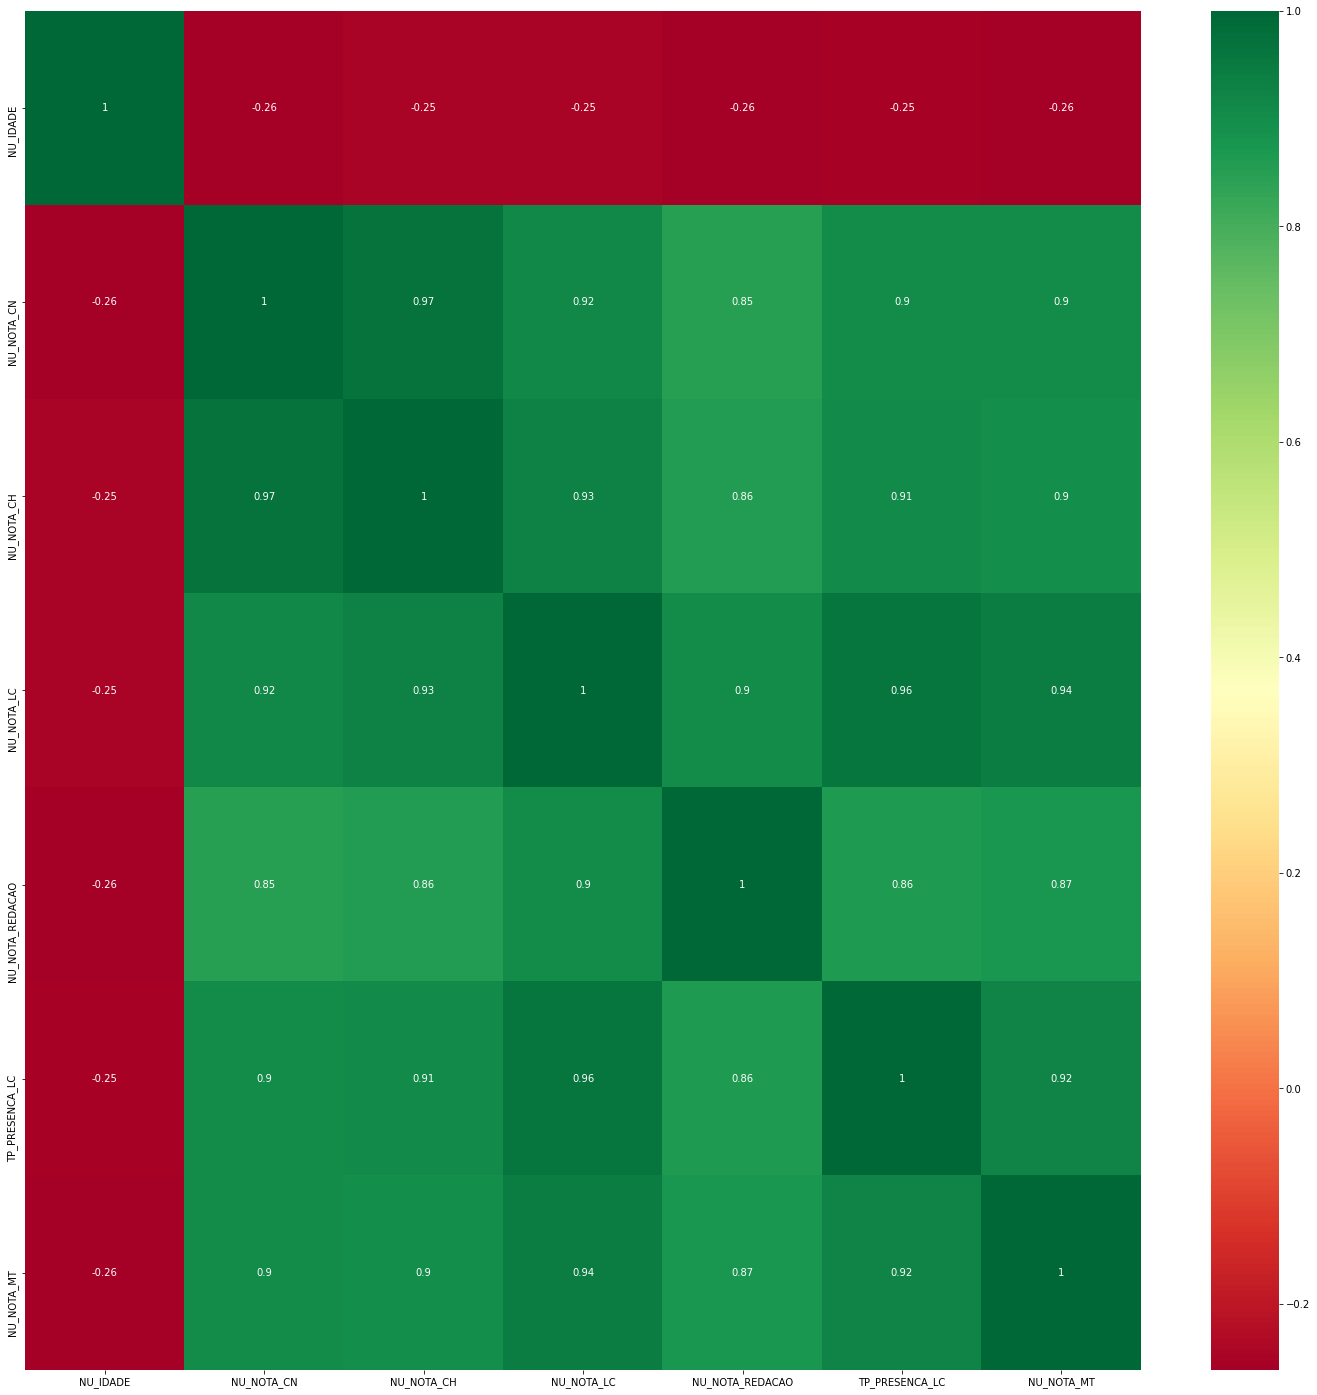

In [13]:
# correlação entre as features
corr_train = X_train.corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr_train, annot=True, cmap=plt.cm.RdYlGn )

plt.show()

In [0]:
# correlação entre as features
corr_test = X_test.corr()

# plt.figure(figsize=(25,25))
# sns.heatmap(corr_test, annot=True, cmap=plt.cm.RdYlGn )

# plt.show()

In [15]:
# OneHotEncoding

features_to_onehotencode = [
                            # 'TP_COR_RACA',
                            # 'TP_ST_CONCLUSAO',
                            # 'TP_ANO_CONCLUIU',
                            # 'TP_ESCOLA',
                            # 'TP_ENSINO',
                            # 'IN_TREINEIRO',
                            # 'TP_DEPENDENCIA_ADM_ESC',
                            # 'IN_BAIXA_VISAO',
                            # 'IN_SURDEZ',
                            # 'IN_SABATISTA',
                            # 'IN_GESTANTE',
                            # 'TP_LINGUA',
                            # 'TP_SEXO',
                            # 'Q001',
                            # 'Q002',
                            # 'Q006',
                            # 'Q024',
                            # 'Q025',
                            # 'Q026',
                            # 'Q047',
                            'TP_PRESENCA_LC',
]
# categorias iniciadas em zero, pode usar drop_first=True
for feature in features_to_onehotencode:
    X_train = pd.get_dummies(X_train, prefix=feature[:6], columns=[feature], drop_first=True)
    X_test = pd.get_dummies(X_test, prefix=feature[:6], columns=[feature], drop_first=True)

X_train.head()

,NU_INSCRICAO,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_MT,TP_PRE_1.0,TP_PRE_2.0
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,0.352853,0.374101,0.400399,0.850128,0.481968,399.4,1,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,-0.646205,0.553689,0.605860,0.925677,0.704814,459.8,1,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,-0.075315,-1.677056,-1.689653,-1.616686,-1.449361,0.0,0,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,0.495575,-1.677056,-1.689653,-1.616686,-1.449361,0.0,0,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,0.923743,-1.677056,-1.689653,-1.616686,-1.449361,0.0,0,0


In [0]:
# para modelos
y_train = X_train.loc[:, 'NU_NOTA_MT']
X_train = X_train.drop(['NU_INSCRICAO', 'NU_NOTA_MT'], axis=1)

# para desafio
numero_inscricoes = X_test.loc[:, 'NU_INSCRICAO']
X_test = X_test.drop('NU_INSCRICAO', axis=1)

In [0]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.dummy import DummyRegressor
from sklearn import metrics

from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
# from sklearn.model_selection import cross_val_score, GridSearchCV

In [0]:
# para testes nos modelos
XTrain, XTest, yTrain, yTest = train_test_split(X_train, y_train, test_size = 0.3 )

In [0]:
# dummy_regr = DummyRegressor()

# dummy_regr.fit(XTrain, yTrain)

# yPred = dummy_regr.predict(XTest)

# print(f'Dummy Score: {dummy_regr.score(yTest, yPred)}')
# # The coefficient of determination: 1 is perfect prediction
# print(f'Coefficient of determination: {r2_score(yTest, yPred)}')
# print(f'Mean squared error: {mean_squared_error(yTest, yPred)}')
# # print(f'Accuracy: {accuracy_score(yTest, yPred)}')

In [19]:
# Regressão Linear
linear_reg = LinearRegression()
linear_reg.fit(XTrain, yTrain)
yPred = linear_reg.predict(XTest)

print(f'Coefficient of determination: {r2_score(yTest, yPred)}')
print(f'Mean squared error: {mean_squared_error(yTest, yPred)}')

print(f'Explained_variance: {metrics.explained_variance_score(yTest, yPred)}')
print(f'Max error: {metrics.max_error(yTest, yPred)}')
print(f'neg_mean_absolute_error: {metrics.mean_absolute_error(yTest, yPred)}')
# print(f'neg_mean_squared_log_error: {metrics.mean_squared_log_error(yTest, yPred)}')
# print(f'neg_median_absolute_error: {metrics.median_absolute_error(yTest, yPred)}')
# print(f'neg_mean_poisson_deviance: {metrics.mean_poisson_deviance(yTest, yPred)}')
# print(f'neg_mean_gamma_deviance: {metrics.mean_gamma_deviance(yTest, yPred)}')

Coefficient of determination: 0.9022419581416603
Mean squared error: 5046.403114376976
Explained_variance: 0.9022725991675341
Max error: 287.52201638248107
neg_mean_absolute_error: 51.33084091082209


In [0]:
# real, para enviar
linear_reg.fit(X_train, y_train)
yPred = linear_reg.predict(X_test)

df_yPred = pd.DataFrame(data=yPred, columns=['NU_NOTA_MT'])
df_num_insc = pd.DataFrame(data=numero_inscricoes, columns=['NU_INSCRICAO'])

df_save = pd.concat([df_num_insc, df_yPred], axis=1)
df_save.to_csv('/content/answer.csv', index=False)


In [21]:
from sklearn.svm import LinearSVR

linear_svr = LinearSVR()
linear_svr.fit(XTrain, yTrain)
yPred = linear_svr.predict(XTest)

print(f'Coefficient of determination: {r2_score(yTest, yPred)}')
print(f'Mean squared error: {mean_squared_error(yTest, yPred)}')

print(f'Explained_variance: {metrics.explained_variance_score(yTest, yPred)}')
print(f'Max error: {metrics.max_error(yTest, yPred)}')
print(f'neg_mean_absolute_error: {metrics.mean_absolute_error(yTest, yPred)}')

Coefficient of determination: 0.8897481954034003
Mean squared error: 5691.348143902071
Explained_variance: 0.8945129115875758
Max error: 332.7614454652869
neg_mean_absolute_error: 50.32928907934583


In [0]:
df_yPred = pd.DataFrame(data=yPred, columns=['NU_NOTA_MT'])
df_num_insc = pd.DataFrame(data=numero_inscricoes, columns=['NU_INSCRICAO'])

df_save = pd.concat([df_num_insc, df_yPred], axis=1)
df_save.to_csv('/content/answer2.csv', index=False)

In [23]:
# Random Forest regressor
rf_regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)

rf_regressor.fit(X_train, y_train)
yPred = rf_regressor.predict(XTest)

print('MAE: ', metrics.mean_absolute_error(yTest, yPred).round(8))
print('MSE: ', metrics.mean_squared_error(yTest, yPred).round(8))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(yTest, yPred)).round(8))

MAE:  18.32713758
MSE:  817.56711422
RMSE:  28.59313054


In [0]:
df_yPred = pd.DataFrame(data=yPred, columns=['NU_NOTA_MT'])
df_num_insc = pd.DataFrame(data=numero_inscricoes, columns=['NU_INSCRICAO'])

df_save = pd.concat([df_num_insc, df_yPred], axis=1)
df_save.to_csv('/content/answer3.csv', index=False)